In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from keras.datasets import cifar10
(x_train, y_train), (x_test,y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [7]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [9]:
#taking a look at 1st image of the array

index=0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

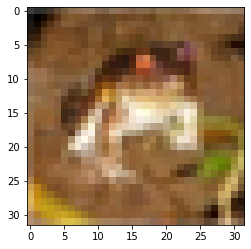

In [10]:
#showing the image as picture

img=plt.imshow(x_train[index])

In [11]:
#get the image label

print('label is:', y_train[index])

label is: [6]


In [15]:
#get the image classification

classification=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 
#print the image class

print('image class is:', classification[y_train[index][0]])

image class is: frog


In [18]:
#converting the labels into set of 10 numbers to input them in neural network
y_train_label=to_categorical(y_train)
y_test_label=to_categorical(y_test)

In [19]:
#print the new labels

print(y_train_label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [20]:
#print label of image/picture above

print('the label is:', y_train_label[index])

the label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [21]:
#normalize pixels to be values between 0 and 1

x_train=x_train/255
x_test=x_test/255

In [22]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [28]:
#creating the model architecture

model= Sequential()
 

#adding first layer
model.add(Conv2D(32,(5,5), activation='relu', input_shape=(32,32,3)))

#adding pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#adding another convolution layer
model.add(Conv2D(32,(5,5), activation='relu'))

#adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#adding flattening layer
model.add(Flatten())

#adding layer with 2000 neurons
model.add(Dense(2000, activation='relu'))

#adding a dropout layer
model.add(Dropout(0.5))

#adding layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#adding a dropout layer
model.add(Dropout(0.5))

#adding a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#adding a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#adding a layer with 5 neurons
model.add(Dense(5, activation='softmax'))

In [29]:
#compiling the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
#train the model

hist=model.fit(x_train,y_train_label, batch_size=256, epochs=5, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 71s 453ms/step - loss: 1.1825 - accuracy: 0.5768 - val_loss: 1.2423 - val_accuracy: 0.5597
Epoch 2/5
157/157 [==============================] - 71s 450ms/step - loss: 1.1008 - accuracy: 0.6079 - val_loss: 1.1611 - val_accuracy: 0.5908
Epoch 3/5
157/157 [==============================] - 71s 453ms/step - loss: 1.0237 - accuracy: 0.6356 - val_loss: 1.0815 - val_accuracy: 0.6179
Epoch 4/5
157/157 [==============================] - 72s 456ms/step - loss: 0.9520 - accuracy: 0.6603 - val_loss: 1.0707 - val_accuracy: 0.6253
Epoch 5/5
157/157 [==============================] - 72s 456ms/step - loss: 0.8842 - accuracy: 0.6873 - val_loss: 1.0506 - val_accuracy: 0.6410


In [32]:
#evaluating the model using train test data set
model.evaluate(x_test,y_test_label)[1]

313/313 [==============================] - 7s 21ms/step - loss: 1.0571 - accuracy: 0.6387


0.638700008392334

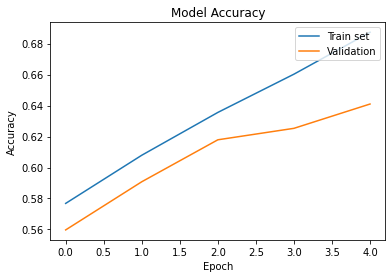

In [33]:
#visualize the accuracy of the model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Validation'], loc= 'upper right')
plt.show()

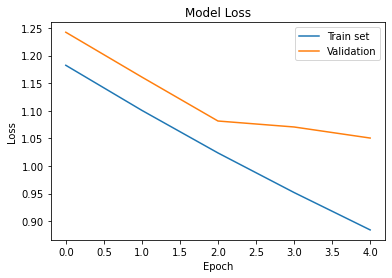

In [34]:
#visualizing the loss of the model

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Validation'], loc= 'upper right')
plt.show()


In [77]:
#testing the model with an example

from google.colab import files
uploaded=files.upload()


Saving dog.jpg to dog.jpg


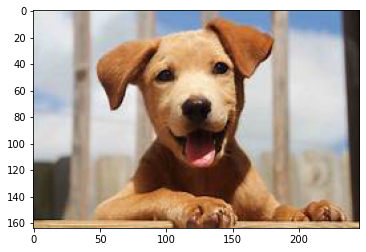

In [79]:
#displaying the image

new_image=plt.imread('dog.jpg')
img=plt.imshow(new_image)

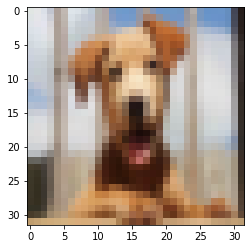

In [80]:
#resizing the image

from skimage.transform import resize
resized_image= resize(new_image, (32,32,3))
img=plt.imshow(resized_image)

In [81]:
#getting the prediction of model

predictions=model.predict(np.array([resized_image]))

#displaying the prediction
predictions

array([[7.62539799e-04, 2.49471515e-04, 1.77735463e-02, 2.48789296e-01,
        2.21080519e-02, 6.73517227e-01, 1.28300395e-02, 2.27821954e-02,
        4.44256439e-04, 7.43360142e-04]], dtype=float32)

In [82]:
#sort the predicitons from least to greatest

list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions
for i in range(10):
  for j in range(10):
    if (x[0][list_index[i]] > x[0][list_index[j]]) .all():
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp
#showing the sorted labels in order
print(list_index)

[5, 3, 7, 4, 2, 6, 0, 9, 8, 1]


In [83]:
for i in range(5):
  print(classification[list_index[i]])

dog
cat
horse
deer
bird
